In [46]:
import os
os.getcwd()

'C:\\Users\\Albert\\Desktop\\DATA SCIENCE\\UBIQUM\\UBIQUM_1X2_Python\\notebooks'

In [47]:
import pandas as pd

xl = pd.ExcelFile('../bbdd/FULL_BBDD_with_features.xlsx')
df = xl.parse(xl.sheet_names[0])

In [48]:
df.drop(df.columns[[i[0:4]=='ref_' for i in df.columns]], axis=1, inplace=True)
df.columns

Index(['TEMPORADA', 'LIGA', 'JORNADA', 'FECHA', 'LOCAL', 'VISITANTE', 'GOL L',
       'GOL V', 'ARBITRO', 'QUINIELA', 'last2_hometeam_w', 'last2_hometeam_d',
       'last2_hometeam_l', 'last5_hometeam_w', 'last5_hometeam_d',
       'last5_hometeam_l', 'last10_hometeam_w', 'last10_hometeam_d',
       'last10_hometeam_l', 'last2_awayteam_w', 'last2_awayteam_d',
       'last2_awayteam_l', 'last5_awayteam_w', 'last5_awayteam_d',
       'last5_awayteam_l', 'last10_awayteam_w', 'last10_awayteam_d',
       'last10_awayteam_l', 'league_local_local_w', 'league_local_local_d',
       'league_local_local_l', 'league_visitor_visitor_w',
       'league_visitor_visitor_d', 'league_visitor_visitor_l', 'h2h_last_10_h',
       'h2h_last_10_d', 'h2h_last_10_a', 'h2h_5_homeaway_h',
       'h2h_5_homeaway_d', 'h2h_5_homeaway_a'],
      dtype='object')

### Preparing models (create train and test, scaling, filtering information)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

Select what part of the dataframe i want to model and create the final dataframe

In [50]:
jornada_cut = 10
league_selec = 1
selec = df[(df['JORNADA']>=jornada_cut) & (df['LIGA'] == league_selec)]

In [51]:
dummy1 = pd.get_dummies(selec.LOCAL)
dummy2 = pd.get_dummies(selec.VISITANTE)
quiniela = pd.get_dummies(selec.QUINIELA)
dummy2.columns = [i+"_2" for i in dummy2.columns]
selec = pd.concat([selec, dummy1, dummy2, quiniela], axis=1)

Save variables from models

In [52]:
selec.columns

Index(['TEMPORADA', 'LIGA', 'JORNADA', 'FECHA', 'LOCAL', 'VISITANTE', 'GOL L',
       'GOL V', 'ARBITRO', 'QUINIELA',
       ...
       'Sporting Gijon_2', 'Tenerife_2', 'Valencia_2', 'Valladolid_2',
       'Villarreal_2', 'Xerez C.D._2', 'Zaragoza_2', '1', '2', 'X'],
      dtype='object', length=127)

In [53]:
import pickle
pickle.dump(selec.columns, open('../models/variables.sav', 'wb'))

### Logistic Regression for "1"

In [30]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ]) | (i in dummy1.columns) |  
                             (i in dummy2.columns)) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['1']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [32]:
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

clf_1 = LogisticRegression(solver='lbfgs')
clf_1.fit(X_train, y_train)
predslog_1 = clf_1.predict(X_test)
probslog_1 = clf_1.predict_proba(X_test)[:,1]
print('F1-Score:', round(f1_score(y_test, predslog_1),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog_1),4))

F1-Score: 0.5622 | Kappa: 0.2024


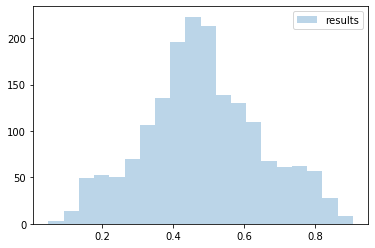

In [33]:
import matplotlib.pyplot as plt
lr = clf_1.predict_proba(X_test)[:,1]
plt.hist(lr, bins = 20, alpha = 0.3, label='results')
plt.legend()

Save model

In [34]:
import pickle
pickle.dump(clf_1, open('../models/model1.sav', 'wb'))

### Logistic Regression for "2"

In [35]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ]) | (i in dummy1.columns) |  
                             (i in dummy2.columns)) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['2']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [37]:
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_2.fit(X_train, y_train)
predslog_2 = clf_2.predict(X_test)
probslog_2 = clf_2.predict_proba(X_test)[:,1]
print('F1-Score:', round(f1_score(y_test, predslog_2),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog_2),4))

F1-Score: 0.2556 | Kappa: 0.1512


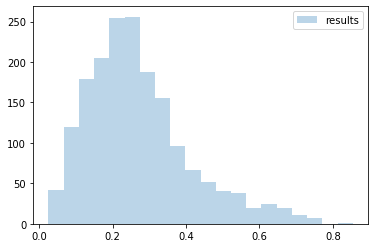

In [38]:
import matplotlib.pyplot as plt
lr = clf_2.predict_proba(X_test)[:,1]
plt.hist(lr, bins = 20, alpha = 0.3, label='results')
plt.legend()

Save model

In [39]:
import pickle
pickle.dump(clf_2, open('../models/model2.sav', 'wb'))

### Logistic Regression for "X"

In [40]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ]) | (i in dummy1.columns) |  
                             (i in dummy2.columns)) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['X']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [42]:
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

clf_x = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_x.fit(X_train, y_train)
predslog_X = clf_x.predict(X_test)
probslog_X = clf_x.predict_proba(X_test)[:,1]
print('F1-Score:', round(f1_score(y_test, predslog_X),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog_X),4))

F1-Score: 0.009 | Kappa: 0.0046


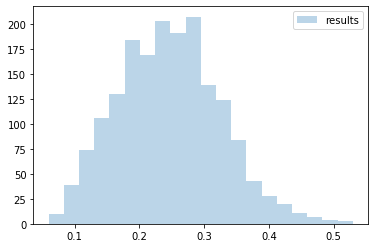

In [43]:
import matplotlib.pyplot as plt
lr = clf_x.predict_proba(X_test)[:,1]
plt.hist(lr, bins = 20, alpha = 0.3, label='results')
plt.legend()

Save model

In [44]:
import pickle
pickle.dump(clf_x, open('../models/modelx.sav', 'wb'))

In [57]:
pickle.dump(X_train.columns, open('../models/training.sav', 'wb'))

### Paste Probabilities for 1X2 in new DF

In [58]:
import pandas as pd 
import numpy as np
zip_probs = list(zip(probslog_1, probslog_X, probslog_2)) 
probs_1X2 = pd.DataFrame(zip_probs, columns = ['predslog_1', 'predslog_X', 'predslog_2']) 

In [59]:
probs_1X2['1'] = probs_1X2.apply(lambda x: x[0]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['X'] = probs_1X2.apply(lambda x: x[1]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['2'] = probs_1X2.apply(lambda x: x[2]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2.drop(["predslog_1", "predslog_X", "predslog_2"], axis=1, inplace=True)

In [60]:
probs_1X2.head()

,1,X,2
0,0.558349,0.136870,0.304781
1,0.628244,0.161285,0.210471
2,0.712159,0.226284,0.061558
3,0.310700,0.208510,0.480790
4,0.378046,0.301939,0.320015


### Probabilities for current Quiniela

In [61]:
import pandas as pd

xl = pd.ExcelFile('../bbdd/QUINIELA_2_FEATURES.xlsx')
quiniela = xl.parse(xl.sheet_names[0])

I create columns for each team since models include them.

In [62]:
dummy1 = pd.get_dummies(quiniela.LOCAL)
dummy2 = pd.get_dummies(quiniela.VISITANTE)
dummy2.columns = [i+"_2" for i in dummy2.columns]
quiniela = pd.concat([quiniela, dummy1, dummy2], axis=1)

Afterwards I detect and create columns with 0 values for teams not in Quiniela since they also will the in the model

In [63]:
add_col = [i for i in list(selec.columns) if i not in list(quiniela.columns)]
add_col = [i for i in add_col if i not in ['GOL L', 'GOL V', 'QUINIELA', 'ARBITRO', '1', 'X', '2']]

In [64]:
for i in add_col:
    quiniela[i] = 0

Calculate probabilities from the models

In [65]:
probslog_1 = clf_1.predict_proba(quiniela[X_train.columns])[:,1]
probslog_X = clf_x.predict_proba(quiniela[X_train.columns])[:,1]
probslog_2 = clf_2.predict_proba(quiniela[X_train.columns])[:,1]

In [67]:
extreme=1

In [68]:
import pandas as pd 
import numpy as np
zip_probs = list(zip(probslog_1**extreme, probslog_X**extreme, probslog_2**extreme, quiniela.LOCAL, quiniela.VISITANTE)) 
probs_1X2 = pd.DataFrame(zip_probs, columns = ['predslog_1', 'predslog_X', 'predslog_2', 'LOCAL', 'VISITANTE']) 

Rescale to sum 1

In [69]:
probs_1X2['1'] = probs_1X2.apply(lambda x: x[0]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['X'] = probs_1X2.apply(lambda x: x[1]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['2'] = probs_1X2.apply(lambda x: x[2]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2.drop(["predslog_1", "predslog_X", "predslog_2"], axis=1, inplace=True)

In [70]:
print(sum(probs_1X2['1'][0:13]))
print(sum(probs_1X2['X'][0:13]))
print(sum(probs_1X2['2'][0:13]))

6.120851675821892
3.6903476023400374
3.1888007218380716


In [72]:
print(probs_1X2[['1','X','2']])

           1         X         2
0   0.461652  0.148939  0.389410
1   0.402096  0.412225  0.185679
2   0.269233  0.397453  0.333315
3   0.379726  0.301218  0.319056
4   0.487163  0.175857  0.336980
5   0.339838  0.399467  0.260696
6   0.447437  0.188135  0.364427
7   0.764903  0.134933  0.100164
8   0.532238  0.258305  0.209456
9   0.418441  0.444155  0.137404
10  0.579742  0.335101  0.085157
11  0.508958  0.276006  0.215036
12  0.529426  0.218554  0.252021
13  0.439021  0.317640  0.243339
14  0.826436  0.092115  0.081449


In [117]:
probs_1X2.to_excel("../bbdd/QUINIELA_3_PROBS.xlsx", index=False)